# INTRODUCTION

With this huge stock dataset I am going to find out if somehow I can predict the value of a stock depending on their open price, this for placing an order at the beginning of the day and finish the day with profit.

# LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("all_stocks_5yr.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### Basic info of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [4]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


### All the stocks available on this dataset

In [5]:
df["Name"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

### Splitting the dataset into Apple, Google, Microsoft and Amazon infotmation

In [6]:
appleFilter = df["Name"]=="AAPL"
apple = df[appleFilter]
apple.set_index('date', inplace=True)
apple.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
googleFilter = df["Name"]=="GOOGL"
google = df[googleFilter]
google.set_index('date', inplace=True)
google.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


In [8]:
microFilter = df["Name"]=="MSFT"
micro = df[microFilter]
micro.set_index('date', inplace=True)
micro.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [9]:
amazonFilter = df["Name"]=="AMZN"
amazon = df[amazonFilter]
amazon.set_index('date', inplace=True)
amazon.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


### Plotting the distribution of the volume of Google

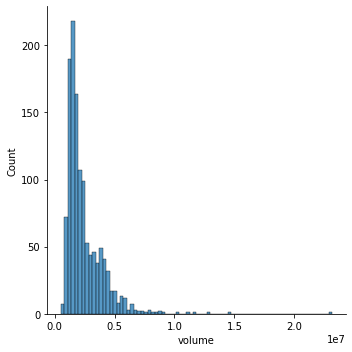

In [10]:
sns.displot(google["volume"])

### Plotting the high correlation between the open and close

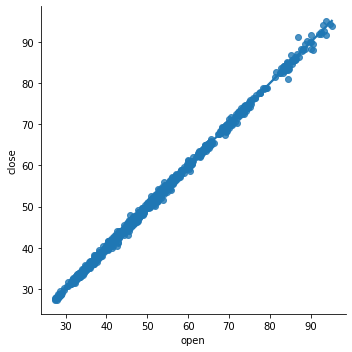

In [11]:
sns.lmplot("open", "close", data = micro)

### Plotting the close stock price of these four companies

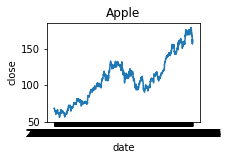

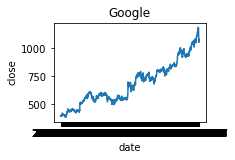

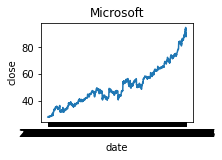

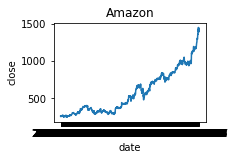

In [12]:
stockList = [apple, google, micro, amazon]
stockName = ["Apple", "Google", "Microsoft", "Amazon"]
i = 1
j= 0
for stock in stockList:
    plt.subplot(2,2,i)
    sns.lineplot("date", "close", data = stock)
    plt.title(stockName[j])
    plt.show()
    i = i+1
    j = j+1

### Plotting the stock price of apple with a SMA of 30 periods

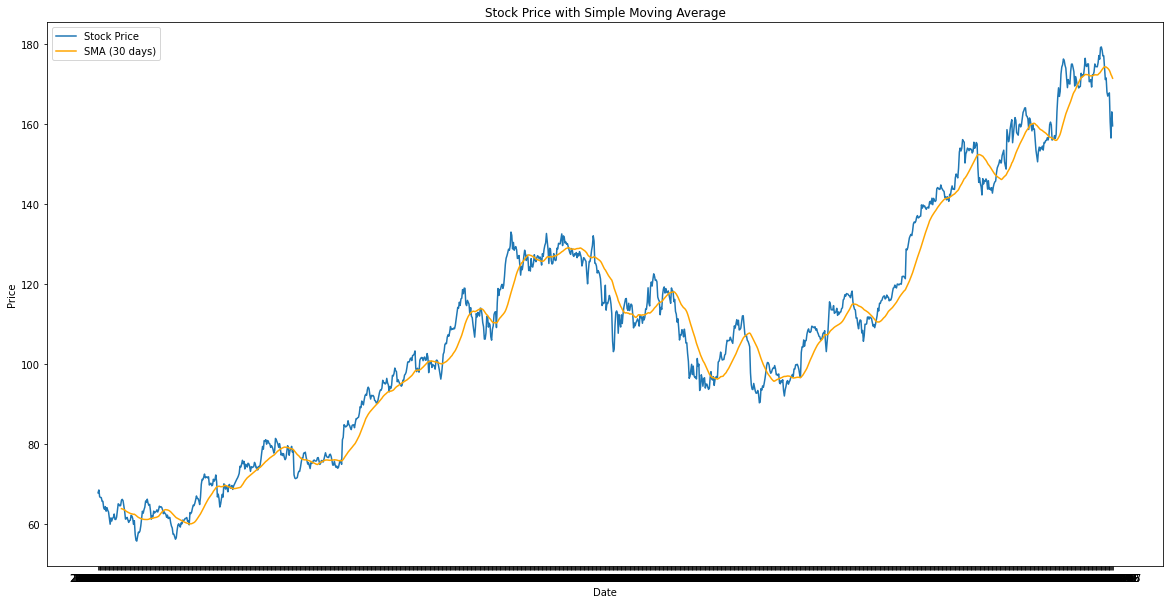

In [13]:
sma_window = 30
apple['SMA'] = apple['close'].rolling(window=sma_window).mean()


plt.figure(figsize=(20, 10))
plt.plot(apple.index, apple['close'], label='Stock Price')
plt.plot(apple.index, apple['SMA'], label=f'SMA ({sma_window} days)', color='orange')
plt.title('Stock Price with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Plotting the stock price of amazon with a SMA of 30 periods and 60 periods

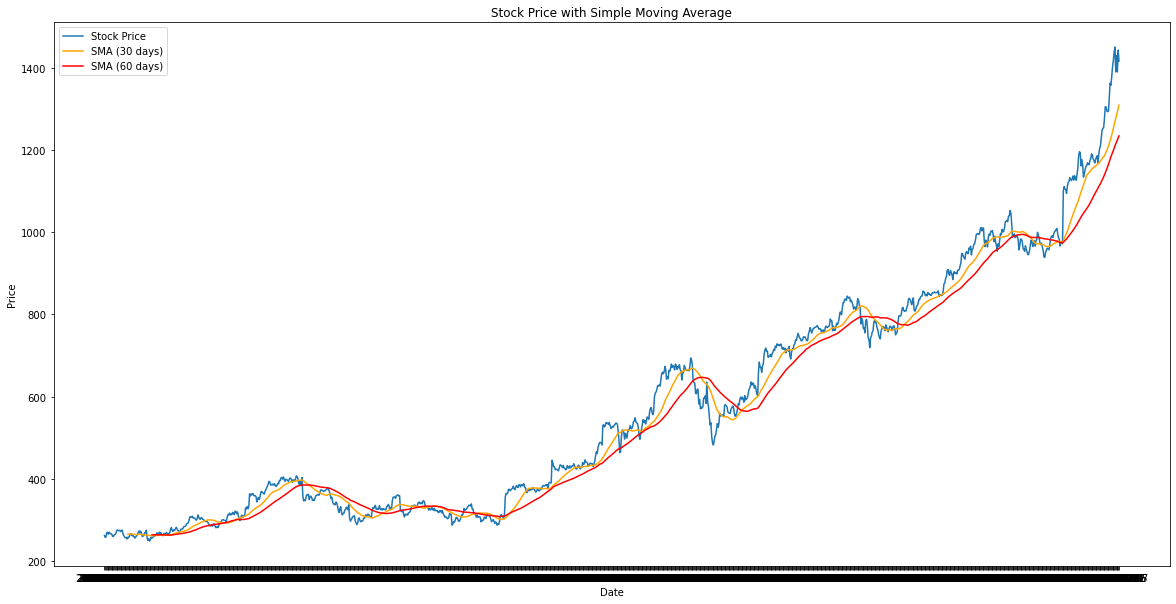

In [14]:
sma_window = 30
sma_window2 = 60
amazon['SMA30'] = amazon['close'].rolling(window=sma_window).mean()
amazon['SMA60'] = amazon['close'].rolling(window=sma_window2).mean()


plt.figure(figsize=(20, 10))
plt.plot(amazon.index, amazon['close'], label='Stock Price')
plt.plot(amazon.index, amazon['SMA30'], label=f'SMA ({sma_window} days)', color='orange')
plt.plot(amazon.index, amazon['SMA60'], label=f'SMA ({sma_window2} days)', color='red')
plt.title('Stock Price with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# MACHINE LEARNING

### Getting the information of HP

In [16]:
hpFilter = df["Name"]=='HP'
hp = df[hpFilter]
hp.set_index('date', inplace=True)
hp.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,64.47,64.50,63.84,64.39,1015654,HP
2013-02-11,65.32,65.40,64.41,64.86,1237180,HP
2013-02-12,65.15,65.44,64.52,65.42,961950,HP
2013-02-13,65.47,65.76,65.20,65.68,848118,HP
2013-02-14,65.50,68.16,65.48,67.86,1387964,HP


### Splitting the dataset into dependent and independent

In [47]:
X = hp[["open"]]
y=hp["close"]

### Splitting the dataset into training and testing

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.5, random_state=101)

### Training the model

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)

### Making predictions

In [50]:
predictions = lm.predict(X_test)

### Plotting the Predicted values vs. the real values

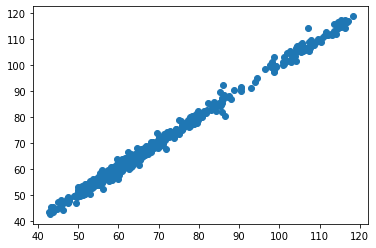

In [51]:
plt.figure(figsize=(20,5))
plt.scatter(y_test, predictions)
plt.show()

### Getting the performance of the model

In [52]:
from sklearn import metrics
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("Variance Score: ", round(100*(metrics.explained_variance_score(y_test, predictions)),2),"%")

RMSE:  1.3238837351406452
Variance Score:  99.4 %


# SIMULATOR

In [65]:
openSim = {"open":152}
openSimDF = pd.DataFrame(openSim, index = [1])

closePred = lm.predict(openSimDF)

print(f"If the price of a HP stock was open at {openSim.values()} probably the price will close at {closePred}")

If the price of a HP stock was open at dict_values([152]) probably the price will close at [151.94148177]
